In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
img_pth = '/home/mposka/data/resultFiles2/whole_fig_pred/rapa_cam_15_2021-03-26_0100_Map.png'

In [20]:
import scipy.misc as spm
img = spm.imread(img_pth)

/home/mposka/miniconda3/envs/leaf_seg/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  


In [8]:
import GUI

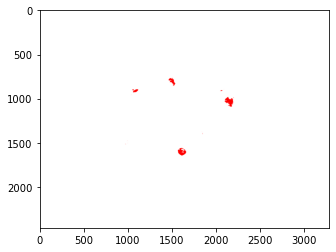

In [9]:
plt.imshow(img)
plt.show()

In [66]:
 # remove non-circle region
def circleFilter( self,new_props,labeled_img,ref_ecc=ref_ecc ):
    print( 'len(new_props2) ',len(new_props) )
    #for i, reg in enumerate(new_props):
    #for i in range( len(new_props) ): 
    #if reg.eccentricity > ref_ecc:
        #print( 'i :',i )
        #print( 'reg :',reg )
        #print( 'reg.shape :',reg.shape )
        #if reg.eccentricity > ref_ecc:
        #    labeled_img[labeled_img == reg.label] = 0
    return labeled_img

In [69]:
import cv2
# This will try to combine regions that are very close to one another
def combineRegions( labeled_img,ref_ecc,pred_img_pth,expand_ratio=1.025,mal=450 ):
    circle_img = np.asarray( labeled_img,dtype=np.uint8 )
    #circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY);
    contours,heir = cv2.findContours( circle_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )

    centers = []
    for c in contours:
        (x,y),r = cv2.minEnclosingCircle( c ) 
        if r > 5 and r < int(mal/2):
            centers.append( [x,y,r] )
    for c in centers:
        cv2.circle( circle_img,(int(c[0]),int(c[1])),int(expand_ratio*c[2]),(255),-1 )
    cir_img_pth = pred_img_pth.replace( '.png','_cir_img.png' )
    imsave( cir_img_pth,circle_img )

    labeled_circle = label(circle_img, connectivity=2)
    lab_cir_pth = pred_img_pth.replace( '.png','_lab_cir.png' )
    imsave( lab_cir_pth,labeled_circle )

    labeled_circle[ labeled_img==0 ] = 0
    labeled_image = labeled_circle
    lab_img_pth = pred_img_pth.replace( '.png','_lab_img.png' )
    imsave( lab_img_pth,labeled_circle )
    imsave( 'labeled_img.png',labeled_image )

    new_props = 0
    new_props = regionprops(labeled_image)
    print( 'len(new_props) :',len(new_props) )
    print( 'new_props[0] :',new_props[0] )
    #for prop in new_props:
    #    print( 'prop: ',prop )
    #    print( 'new_props[prop] ',new_props[prop] )
    #print( 'new_props :',new_props['eccentricity'] )
    # remove non-circle region
    #labeled_img = circleFilter( new_props,labeled_image,ref_ecc )

    return labeled_img



In [70]:
from skimage.measure import label, regionprops
from scipy.misc import imsave
from utils.transforms import vl2im

img_3c = img
img_1c = np.where( img_3c[:,:,2]!=255,1,0 )
labeled_img = label(img_1c,connectivity=2)
print( 'labeled_img.shape :',labeled_img.shape )

ref_ecc=0.75
pred_img_pth='failtest.png'
labeled_img = combineRegions(labeled_img,ref_ecc,pred_img_pth)

labeled_img.shape : (2464, 3280)


/home/mposka/miniconda3/envs/leaf_seg/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
  app.launch_new_instance()
/home/mposka/miniconda3/envs/leaf_seg/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
/home/mposka/miniconda3/envs/leaf_seg/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
/home/mposka/miniconda3/envs/leaf_seg/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use `

len(new_props) : 19
new_props[0] : <skimage.measure._regionprops.RegionProperties object at 0x7f3b18215518>
